# Kresling Compression Test Analysis
The following code is used to plot the results of a Kresling compression test.

## Import Relevant Modules
Code runs on `numpy`, `matplotlib`, and `csv`. `numpy` is referred to as `np` and `matplotlib.pyplot` is referred to as `plt` for simplicity.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## Import .csv
To analyze the results of the test, the .csv file containing the test results must be opened. The `with` statement is a form of exception handling that uses the `__enter__()` and `__exit__()` methods built into `open()` that ensures the following code is run only when the file is opened correctly. It automatically closes the file at the end of the code block \[[1](https://www.geeksforgeeks.org/with-statement-in-python/)\].

The `as` keyword assigns an alias to a resource. In other words, `csv_file` is the alias for (a variable that refers to) the .csv file we're opening \[[2](https://www.geeksforgeeks.org/python-as-keyword/)\].

A csv reader object for our test results is stored in `csv_reader`. This object is essentially a collection of all the rows in our test results file, and every row is a list with a string for each column \[[3](https://docs.python.org/3/library/csv.html)\].

Numpy arrays are built to collect the three variables we care about: displacement, time, and force.

Now the lists in the csv reader object are iterated over so we can collect the relevant data in our numpy arrays. `row_count` ensures we skip the first four rows, which consist of empty cells and headers in the test results file. After the first four rows, we append the value from the corresponding column in each of our numpy arrays (ex: the first value \[0] is the first column, which has force values).

In [7]:
with open('kresling_L0.75_FS_A.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    row_count = 0
    disp = np.array([])
    time = np.array([])
    force = np.array([])
    for row in csv_reader:
        if row_count > 3:
            disp = np.append(disp, float(row[1]))
            time = np.append(time, float(row[2]))
            force = np.append(force, float(row[0]))
        else:
            row_count += 1      

## Zeroing out the data
Now the three numpy arrays contain all the data for displacement, time, and force from the test results file. The force value is 135g lower than it should be because of the 135g weight on top of the Kresling. This is equal to 1.32435 N, which is subtracted from each force value in the force array.

In [8]:
force = force - 1.32435

## Plotting the data
Now the data is ready to be plotted. A Figure object and an Axes object are returned by the `plt.subplots()` method and stored into the `fig` and `ax` variables respectively \[[9](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)\].

The `plot(x,y)` method is called on `ax` to assign the force vs. displacement values to the y and x axes respectives \[[10](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)]. `set()` alters the the properties of the resulting plot: here it's used to label the axes \[[11](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)\]. `grid()` configures the grid lines of the resulting plot \[[12](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)]. Finally, the figure is saved as a .png file via `savefig()` \[[13](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)\] and the plot is displayed via `show()` \[[14](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.show)\].

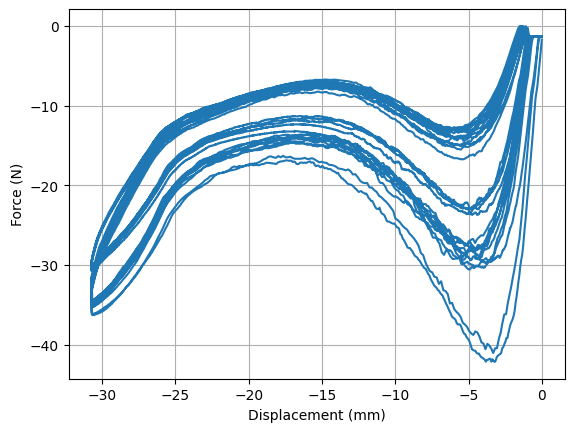

In [9]:
fig, ax = plt.subplots()
ax.plot(disp,force)

ax.set(xlabel='Displacement (mm)', ylabel='Force (N)')
ax.grid()

fig.savefig("[kresling_L0.75_FS_A]_force_vs_disp.png")
plt.show()